# E-commerce Python Analysis
- This notebook does data exploration, cleaning, and analysis of a publicly available ecommerce dataset from [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/)

Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Create Dataframes from csv files

In [2]:
df_customers = pd.read_csv('/Users/kelly.bergen/virtualenvs/data-science/archive/olist_customers_dataset.csv')
df_orders = pd.read_csv('/Users/kelly.bergen/virtualenvs/data-science/archive/olist_orders_dataset.csv')
df_oli = pd.read_csv('/Users/kelly.bergen/virtualenvs/data-science/archive/olist_order_items_dataset.csv')
df_products = pd.read_csv('/Users/kelly.bergen/virtualenvs/data-science/archive/olist_products_dataset.csv')
df_prod_cat = pd.read_csv('/Users/kelly.bergen/virtualenvs/data-science/archive/product_category_name_translation.csv')

Explore the data

In [3]:
df_customers.info()
df_customers.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

~100k Customers. Some customers are duplicated, likely with >1 address. 

In [31]:
duplicates = df_customers[df_customers.duplicated(subset='customer_unique_id', keep=False)]
original_duplicates = df_customers[df_customers['customer_id'].isin(duplicates['customer_id'])]

original_duplicates = original_duplicates.sort_values(by='customer_unique_id')

print(original_duplicates)

                            customer_id                customer_unique_id  \
35608  24b0e2bd287e47d54d193e7bbb51103f  00172711b30d52eea8b313a7f2cced02   
19299  1afe8a9c67eec3516c09a8bdcc539090  00172711b30d52eea8b313a7f2cced02   
20023  1b4a75b3478138e99902678254b260f4  004288347e5e88a27ded2bb23747066c   
22066  f6efe5d5c7b85e12355f9d5c3db46da2  004288347e5e88a27ded2bb23747066c   
72451  49cf243e0d353cd418ca77868e24a670  004b45ec5c64187465168251cd1c9c2f   
...                                 ...                               ...   
75057  1ae563fdfa500d150be6578066d83998  ff922bdd6bafcdf99cb90d7f39cea5b3   
27992  bec0bf00ac5bee64ce8ef5283051a70c  ff922bdd6bafcdf99cb90d7f39cea5b3   
79859  d064be88116eb8b958727aec4cf56a59  ff922bdd6bafcdf99cb90d7f39cea5b3   
64323  4b231c90751c27521f7ee27ed2dc3b8f  ffe254cc039740e17dd15a5305035928   
12133  0088395699ea0fcd459bfbef084997db  ffe254cc039740e17dd15a5305035928   

       customer_zip_code_prefix customer_city customer_state  
35608       

In [20]:
df_orders.info()
df_orders.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

There are the same number of orders as there are rows in df_customers. Perhaps customer_unique_id is the customer identifier and it's duplicated for each order. Alternatively, no one is purchasing >1 order at the same address.

Explore the order dates:
1. What is the earliest/latest order_purchase_timestamp?
2. which date has the highest total orders?
3. which day of week has the most orders? Are orders placed on weekends?

In [32]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
earliest_date = df_orders['order_purchase_timestamp'].min()
latest_date = df_orders['order_purchase_timestamp'].max()
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)




Earliest Date: 2016-09-04 21:15:19
Latest Date: 2018-10-17 17:30:18


Date with Highest Total Order Volume: 2017-11-24
Highest Total Order Volume: 1176


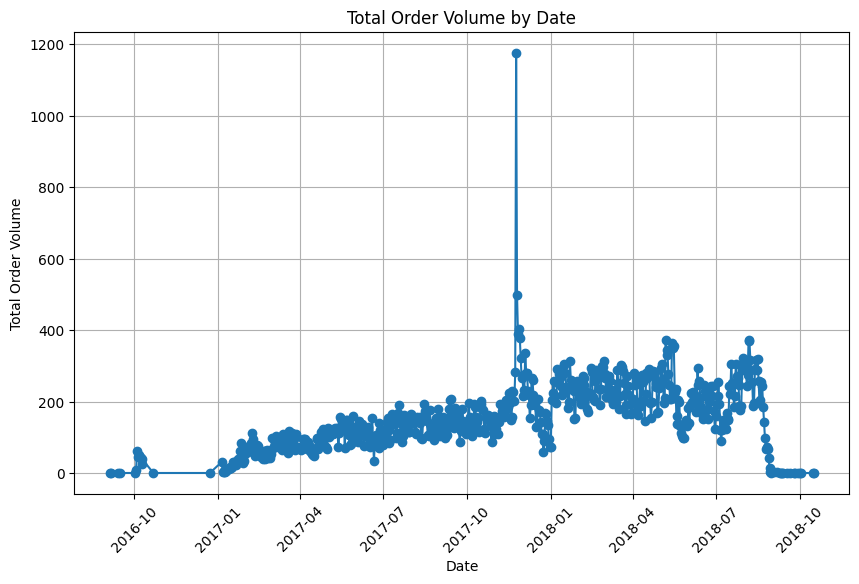

In [36]:
order_volume_by_date = df_orders.groupby(df_orders['order_purchase_timestamp'].dt.date)['order_id'].count()
date_with_highest_volume = order_volume_by_date.idxmax()
highest_volume = order_volume_by_date.max()
print("Date with Highest Total Order Volume:", date_with_highest_volume)
print("Highest Total Order Volume:", highest_volume)
# Plot Total Order Volume by Date
plt.figure(figsize=(10, 6))
plt.plot(order_volume_by_date.index, order_volume_by_date.values, marker='o', linestyle='-')
plt.title('Total Order Volume by Date')
plt.xlabel('Date')
plt.ylabel('Total Order Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


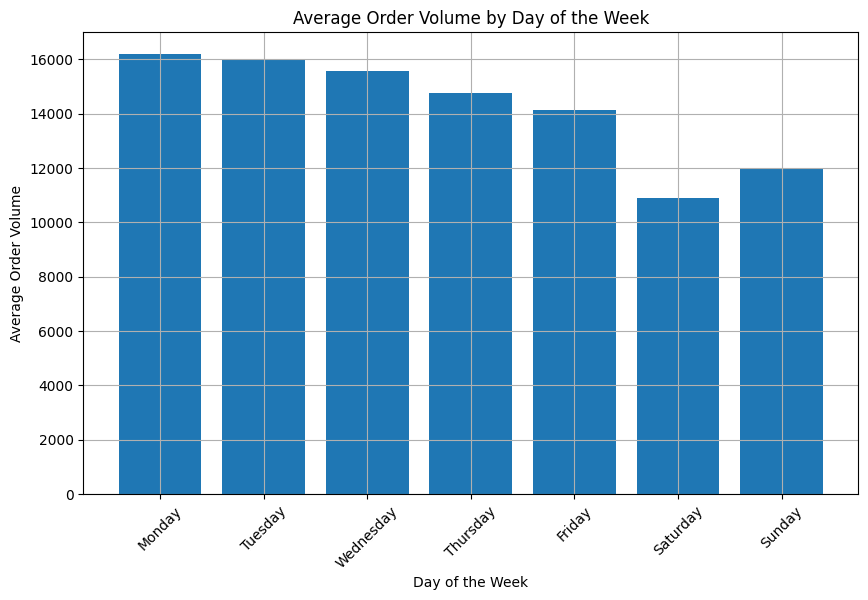

In [38]:
# Explore the days of week that orders are placed. What is teh average number of orders on each day?

df_orders['day_of_week'] = df_orders['order_purchase_timestamp'].dt.dayofweek
order_volume_by_day = df_orders.groupby('day_of_week')['order_id'].count()

# Define day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot Average Order Volume by Day of the Week
plt.figure(figsize=(10, 6))
plt.bar(day_labels, order_volume_by_day)
plt.title('Average Order Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Order Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
df_oli.info()
df_oli.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

There is no unique primary key in this table. Also, df_orders.order_id count > df_oli.order_id so some orders don't exist in df_oli. 

In [22]:
df_orders.describe()
df_oli.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000
